In [2]:
# https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-1%E8%AC%9B-kaggle%E7%AB%B6%E8%B3%BD-%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC-%E5%89%8D16-%E6%8E%92%E5%90%8D-a8842fea7077
# https://chtseng.wordpress.com/2017/12/24/kaggle-titanic%E5%80%96%E5%AD%98%E9%A0%90%E6%B8%AC-1/

from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

In [3]:
train = pd.read_csv("Titanic/train.csv")
test = pd.read_csv("Titanic/test.csv")
submit = pd.read_csv('Titanic/gender_submission.csv')

In [5]:
# Train與Test dataset皆為二維陣列，Train有12個欄位891 records，Test則有11個欄位418 records。
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 有空值需要處理

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Combine Train and Test Data

In [15]:
data = train.append(test)
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [16]:
print(data.shape)

(1309, 12)


In [17]:
data.reset_index(inplace=True, drop=True)
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


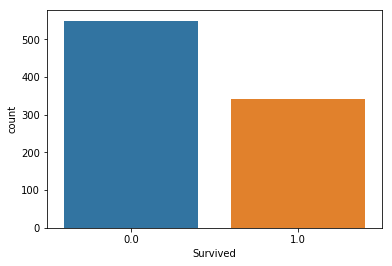

In [19]:
sns.countplot(data['Survived'])

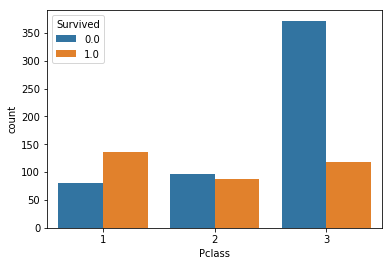

In [20]:
sns.countplot(data['Pclass'], hue=data['Survived'])

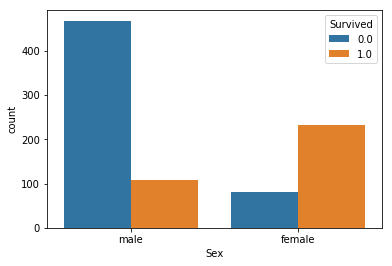

In [21]:
sns.countplot(data['Sex'], hue=data['Survived'])

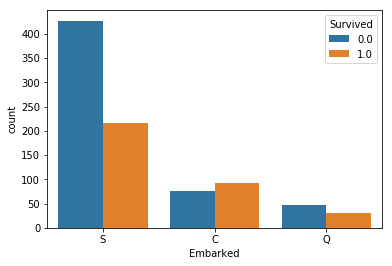

In [22]:
sns.countplot(data['Embarked'], hue=data['Survived'])

### Feature Engineering

In [30]:
data['Name'].str.split(", ", expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [28]:
data['Title0'] = data['Name'].str.split(", ", expand=True)[0]
data['Title0'].head(10)

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
5        Moran
6     McCarthy
7      Palsson
8      Johnson
9       Nasser
Name: Title0, dtype: object

In [29]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]
data['Title1'].head(10)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
3            Mrs. Jacques Heath (Lily May Peel)
4                             Mr. William Henry
5                                     Mr. James
6                                 Mr. Timothy J
7                         Master. Gosta Leonard
8      Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Mrs. Nicholas (Adele Achem)
Name: Title1, dtype: object

In [32]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]
data['Title1'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title1, dtype: object

In [37]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [38]:
data['Title1'].unique().shape

(18,)

In [46]:
# 第一个参数是指定index，第二个参数是指定column 
pd.crosstab(data['Title1'],data['Sex'])

Sex,female,male
Title1,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [47]:
pd.crosstab(data['Title1'],data['Survived'])

Survived,0.0,1.0
Title1,,
Capt,1,0
Col,1,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,127


In [53]:
data.groupby(['Title1']).mean()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Title1,,,,,,,
Capt,70.000000,71.000000,1.000000,746.000000,1.000000,1.000000,0.000000
Col,54.000000,79.518750,0.000000,865.000000,1.000000,0.250000,0.500000
Don,40.000000,27.720800,0.000000,31.000000,1.000000,0.000000,0.000000
Dona,39.000000,108.900000,0.000000,1306.000000,1.000000,0.000000,NaN
Dr,43.571429,53.254687,0.125000,625.750000,1.250000,0.625000,0.428571
Jonkheer,38.000000,0.000000,0.000000,823.000000,1.000000,0.000000,0.000000
Lady,48.000000,39.600000,0.000000,557.000000,1.000000,1.000000,1.000000
Major,48.500000,28.525000,0.000000,493.500000,1.000000,0.000000,0.500000
Master,5.482642,36.008195,1.377049,658.852459,2.655738,2.049180,0.575000


In [54]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [55]:
data.groupby(['Title1','Pclass']).mean()

Age        Fare     Parch  PassengerId     SibSp  \
Title1       Pclass                                                           
Capt         1       70.000000   71.000000  1.000000   746.000000  1.000000   
Col          1       54.000000   79.518750  0.000000   865.000000  0.250000   
Don          1       40.000000   27.720800  0.000000    31.000000  0.000000   
Dona         1       39.000000  108.900000  0.000000  1306.000000  0.000000   
Dr           1       45.600000   66.922917  0.166667   714.833333  0.833333   
             2       38.500000   12.250000  0.000000   358.500000  0.000000   
Jonkheer     1       38.000000    0.000000  0.000000   823.000000  0.000000   
Lady         1       48.000000   39.600000  0.000000   557.000000  1.000000   
Major        1       48.500000   28.525000  0.000000   493.500000  0.000000   
Master       1        6.984000  150.056660  2.000000   719.800000  0.800000   
             2        2.757273   27.386745  1.272727   567.181818  0.818182   
             3        6.090000   25.443609  1.333333   674.488889  2.488889   
Miss         1       30.338983  130.218958  0.516667   583.900000  0.350000   
             2       20.717083   22.571500  0.640000   656.940000  0.400000   
             3       17.360874   14.375697  0.453333   616.500000  0.880000   
Mlle         1       24.000000   59.402100  0.000000   676.500000  0.000000   
Mme          1       24.000000   69.300000  0.000000   370.000000  0.000000   
Mr           1       41.450758   68.260090  0.238994   655.138365  0.308176   
             2       32.346715   19.527443  0.113333   713.633333  0.300000   
             3       28.318910   11.103904  0.147321   643.015625  0.267857   
Mrs          1       43.208955   97.314448  0.480519   767.961039  0.753247   
             2       33.518519   24.023940  0.672727   613.109091  0.600000   
             3       32.326531   17.629743  1.384615   650.430769  0.600000   
Ms           2       28.000000   13.000000  0.000000   444.000000  0.000000   
             3             NaN    7.750000  0.000000   980.000000  0.000000   
Rev          2       41.250000   18.609375  0.250000   626.375000  0.250000   
Sir          1       49.000000   56.929200  0.000000   600.000000  1.000000   
the Countess 1       33.000000   86.500000  0.000000   760.000000  0.000000   

                     Survived  
Title1       Pclass            
Capt         1       0.000000  
Col          1       0.500000  
Don          1       0.000000  
Dona         1            NaN  
Dr           1       0.600000  
             2       0.000000  
Jonkheer     1       0.000000  
Lady         1       1.000000  
Major        1       0.500000  
Master       1       1.000000  
             2       1.000000  
             3       0.392857  
Miss         1       0.956522  
             2       0.941176  
             3       0.500000  
Mlle         1       1.000000  
Mme          1       1.000000  
Mr           1       0.345794  
             2       0.087912  
             3       0.112853  
Mrs          1       0.976190  
             2       0.902439  
             3       0.500000  
Ms           2       1.000000  
             3            NaN  
Rev          2       0.000000  
Sir          1       1.000000  
the Countess 1       1.000000

In [65]:
data['Title1'].shape

(1309,)

In [68]:
# 透過 pandas 的 value_counts() 方法可以統計相異值的個數。
pd.value_counts(data['Title1'])

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Capt              1
Mme               1
Don               1
Sir               1
Dona              1
Lady              1
the Countess      1
Jonkheer          1
Name: Title1, dtype: int64

In [70]:
# do not know the replace rule
data['Title2'] = data['Title1'] \
.replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [71]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [72]:
data.groupby('Title2')['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [73]:
pd.crosstab(data['Title2'],data['Sex'])

Sex,female,male
Title2,,
Master,0,61
Miss,264,0
Mr,1,782
Mrs,201,0


In [74]:
pd.crosstab(data['Title2'],data['Survived'])

Survived,0.0,1.0
Title2,,
Master,17,23
Miss,55,130
Mr,451,87
Mrs,26,102


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title1         1309 non-null object
Title0         1309 non-null object
Title2         1309 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [78]:
data['Ticket_info'] = \
data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [79]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS', 'SOP',
       'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS',
       'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4', 'A',
       'LP', 'AQ3'], dtype=object)

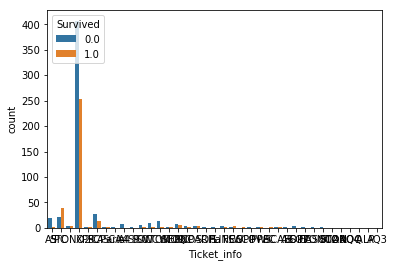

In [80]:
sns.countplot(data['Ticket_info'], hue=data['Survived'])

### Missing Value

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title1         1309 non-null object
Title0         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 163.7+ KB


In [81]:
pd.value_counts(data['Embarked'])

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [83]:
data['Embarked'] = data['Embarked'].fillna('S')

In [85]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title1         1309 non-null object
Title0         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 163.7+ KB


In [87]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [88]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [89]:
data['Cabin'].head(10)

0    NoCabin
1          C
2    NoCabin
3          C
4    NoCabin
5    NoCabin
6          E
7    NoCabin
8    NoCabin
9    NoCabin
Name: Cabin, dtype: object

In [90]:
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

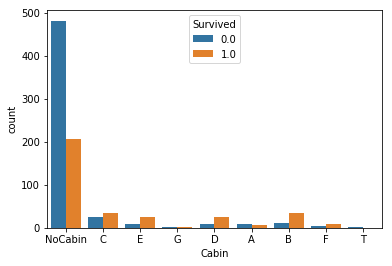

In [91]:
sns.countplot(data['Cabin'], hue=data['Survived'])